In [127]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.animation as animation

In [134]:
def get_stats(a):
    print(f"min: {np.min(a)}, max: {np.max(a)}, mean: {np.mean(a)}")

In [111]:
# Assuming you have band data (replace these with your actual band data)
human_individual_mask = np.load('data/human_individual_masks.npy')
human_pixel_mask = np.load('data/human_pixel_masks.npy')

Text(0.5, 1.0, 'Band 15')

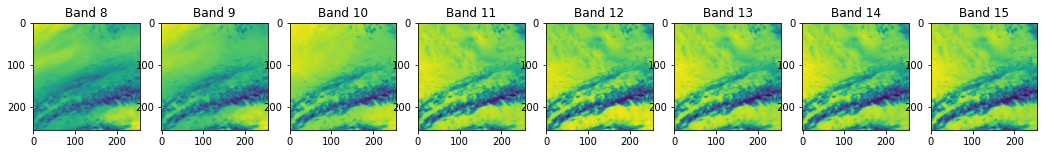

In [145]:
band8_data = np.load('data/band_08.npy')
band9_data = np.load('data/band_09.npy')
band10_data = np.load('data/band_10.npy')
band11_data = np.load('data/band_11.npy')
band12_data = np.load('data/band_12.npy')
band13_data = np.load('data/band_13.npy')
band14_data = np.load('data/band_14.npy')
band15_data = np.load('data/band_15.npy')

# Visualize each band
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 8, 1)
ax.imshow(band8_data[..., 4])
ax.set_title('Band 8')
ax = plt.subplot(1, 8, 2)
ax.imshow(band9_data[..., 4])
ax.set_title('Band 9')
ax = plt.subplot(1, 8, 3)
ax.imshow(band10_data[..., 4])
ax.set_title('Band 10')
ax = plt.subplot(1, 8, 4)
ax.imshow(band11_data[..., 4])
ax.set_title('Band 11')
ax = plt.subplot(1, 8, 5)
ax.imshow(band12_data[..., 4])
ax.set_title('Band 12')
ax = plt.subplot(1, 8, 6)
ax.imshow(band13_data[..., 4])
ax.set_title('Band 13')
ax = plt.subplot(1, 8, 7)
ax.imshow(band14_data[..., 4])
ax.set_title('Band 14')
ax = plt.subplot(1, 8, 8)
ax.imshow(band15_data[..., 4])
ax.set_title('Band 15')

(256, 256, 8) (256, 256, 8) (256, 256, 8)
min: 0.0, max: 1.0, mean: 0.543045163154602
None


Text(0.5, 1.0, 'False color image')

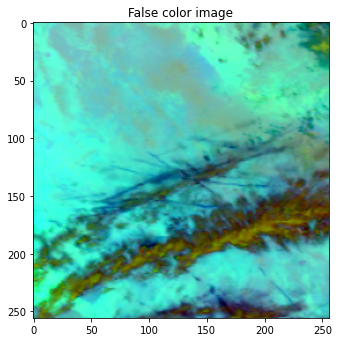

In [135]:
_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)

def normalize_range(data, bounds):
    """Maps data to the range [0, 1]."""
    return (data - bounds[0]) / (bounds[1] - bounds[0])

r = normalize_range(band15_data - band14_data, _TDIFF_BOUNDS)
g = normalize_range(band14_data - band11_data, _CLOUD_TOP_TDIFF_BOUNDS)
b = normalize_range(band14_data, _T11_BOUNDS)
print(r.shape, g.shape, b.shape)
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)
print(get_stats(false_color))
img = false_color[..., 4]
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

(256, 256, 8) (256, 256, 8) (256, 256, 8)
min: 0.0, max: 1.0, mean: 0.6409844756126404
None


Text(0.5, 1.0, 'False color image')

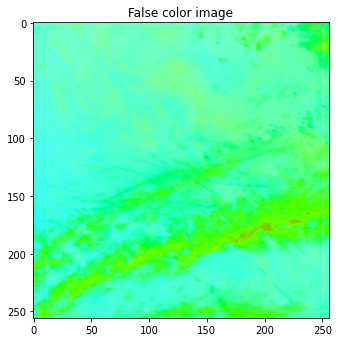

In [143]:
_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)

def normalize_range(data, bounds):
    """Maps data to the range [0, 1]."""
    return (data - bounds[0]) / (bounds[1] - bounds[0])

r = normalize_range(band15_data - band14_data, _TDIFF_BOUNDS)
g = normalize_range(band14_data - band10_data, _CLOUD_TOP_TDIFF_BOUNDS)
b = normalize_range(band14_data, _T11_BOUNDS)
print(r.shape, g.shape, b.shape)
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)
print(get_stats(false_color))
img = false_color[..., 4]
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

(256, 256, 8) (256, 256, 8) (256, 256, 8)
min: 0.0, max: 1.0, mean: 0.6627913117408752
None


Text(0.5, 1.0, 'False color image')

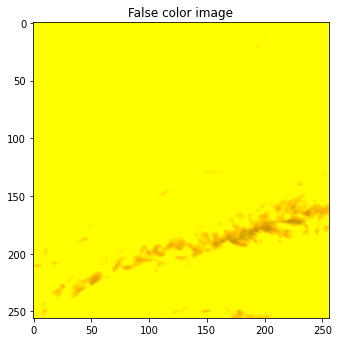

In [144]:
_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)

def normalize_range(data, bounds):
    """Maps data to the range [0, 1]."""
    return (data - bounds[0]) / (bounds[1] - bounds[0])

r = normalize_range(band10_data - band9_data, _TDIFF_BOUNDS)
g = normalize_range(band9_data - band8_data, _CLOUD_TOP_TDIFF_BOUNDS)
b = normalize_range(band8_data, _T11_BOUNDS)
print(r.shape, g.shape, b.shape)
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)
print(get_stats(false_color))
img = false_color[..., 4]
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

In [126]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter('false_color_video.gif', fourcc, 20.0, (256, 256))
for i in range(8):
    img = false_color[..., i]
    video_writer.write(img.astype(np.uint8))
video_writer.release()

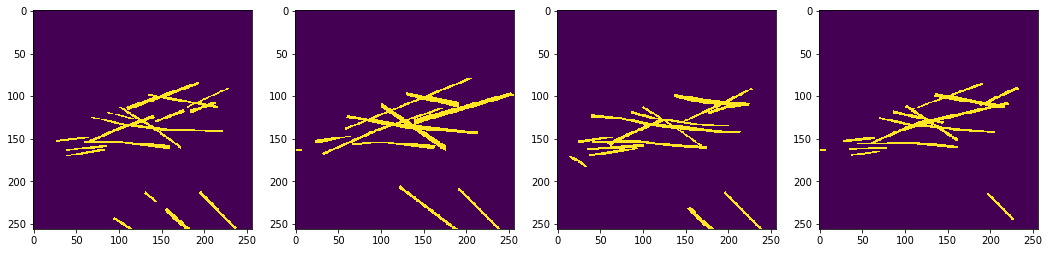

In [120]:
plt.figure(figsize=(18, 6))
for i in range(4):
    img = human_individual_mask[..., i]
    ax = plt.subplot(1, 4, i+1)
    ax.imshow(img, interpolation='none')

Text(0.5, 1.0, 'Ground truth contrail mask')

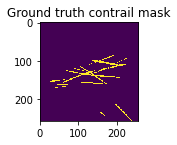

In [121]:
ax = plt.subplot(1, 3, 1)
ax.imshow(human_pixel_mask, interpolation='none')
ax.set_title('Ground truth contrail mask')

Text(0.5, 1.0, 'Ground truth contrail mask')

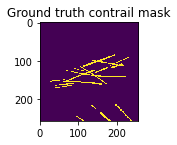

In [117]:
ax = plt.subplot(1, 3, 2)
ax.imshow(human_individual_mask[..., 0], interpolation='none')
ax.set_title('Ground truth contrail mask')